# Proceso de comprensión y preparación de datos

## Recogida, comprensión y evaluación de calidad de datos
Un problema que se identificó a priori es que el tipo de dato de SDG en el test set es float, cuando debería ser int. Por otro lado, hay muchos caracteres especiales que deben ser tratados.

In [83]:
import pandas as pd
import re
from sklearn.svm import SVC
import chardet
from num2words import num2words
import spacy
pd.set_option('display.max_rows', None)

# Mostrar todo el contenido de las celdas, sin truncar
pd.set_option('display.max_colwidth', None)

file1 = 'ODScat_345.csv' 
file2 = 'TestODScat_345.csv'  

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Functions
def find_unusual_characters(df, column_name):
    all_text = ' '.join(df[column_name].astype(str))
    unusual_chars = re.findall(r'[^\w\s,.!?;:\-()\'"]', all_text)
    return set(unusual_chars)

# Understanding
print("First few rows of training set:")
display(df1.head())

print("First few rows of test set:")
display(df2.head())

print("\nShape of training set:", df1.shape)

print("Shape of validation set:", df2.shape)

print("\nInfo for training set:")
df1.info()
print("\nInfo for validation set:")
df2.info()

print("\nDescriptive statistics for training set:")
display(df1.describe(include='all')) 

print("\nDescriptive statistics for validation set:")
display(df2.describe(include='all'))

print("\nBasic statistics for natural_text length in training set:")
display(df1['Textos_espanol'].str.len().describe())

print("\nBasic statistics for natural_text length in validation set:")
display(df2['Textos_espanol'].str.len().describe())

print("Distribution of SDG categories in training set:")
distribution_file1 = df1['sdg'].value_counts()
display(distribution_file1)

print("\nDistribution of SDG categories in test set:")
distribution_file2 = df2['sdg'].value_counts()
display(distribution_file2)

print("\nUnusual characters in training set:")
unusual_chars_file1 = find_unusual_characters(df1, 'Textos_espanol')
display(unusual_chars_file1)

print("\nUnusual characters in validation set:")
unusual_chars_file2 = find_unusual_characters(df2, 'Textos_espanol')
display(unusual_chars_file2)

# Consistency
print("\nColumn names in training set:", df1.columns.tolist())
print("Column names in test:", df2.columns.tolist())

print("\nData types in training set:")
display(df1.dtypes)

print("Data types in test set:")
display(df2.dtypes)

# Uniqueness
print("Checking for duplicated rows within each file...\n")

duplicates_file1 = df1[df1.duplicated()]
print(f"Number of duplicated rows in training set: {len(duplicates_file1)}")
display(duplicates_file1)

duplicates_file2 = df2[df2.duplicated()]
print(f"Number of duplicated rows in test set: {len(duplicates_file2)}")
display(duplicates_file2)

print("\nChecking for common rows between file1 and file2...")

common_rows = pd.merge(df1, df2, how='inner')
print(f"Number of common rows between file1 and file2: {len(common_rows)}")
display(common_rows)

if len(common_rows) > 0:
    print("\nCommon rows found in both files:")
    display(common_rows)
else:
    print("\nNo common rows found in both files.")

# Missing values
print("\nMissing values in training set:")
display(df1.isnull().sum())

print("Missing values in validation set:")
display(df2.isnull().sum())

# Validity
print("\nUnique labels in test set:")
display(df1['sdg'].unique())

print("Unique labels in validation set:")
display(df2['sdg'].unique())


First few rows of training set:


,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3
3,"Por ejemplo, el estado australiano de Victoria creó una agencia de promoción de la salud financiada con los impuestos sobre el tabaco, y varios estados de EE.UU. (California, Massachusetts, Arizona y Oregón) han destinado parte de los ingresos procedentes de los impuestos especiales sobre el tabaco a actividades de educación y control del tabaco, mientras que en Nueva Jersey, Ohio y Texas los ingresos procedentes del alcohol se utilizan para programas de educación y prevención relacionados con el alcohol (Sassi et al., 2004), Los impuestos locales pueden ser una fuente importante de ingresos, sobre todo en los sistemas sanitarios descentralizados (por ejemplo, Dinamarca, Finlandia, Italia y Suecia)17 . Además, el nivel de los impuestos locales puede fijarse en función de las preferencias locales sobre el nivel y la calidad de los servicios médicos. Sin embargo, en ausencia de un mecanismo de transferencia ajustado al riesgo y gestionado centralmente, la descentralización reduce la mancomunación de riesgos y podría dar lugar a mayores disparidades sanitarias interregionales.",3
4,"El consumo anual de alcohol se estima en 15,7 litros al año para los hombres, más de un 50% por encima de la media de la OCDE (10,4) (Sistema mundial de información sobre alcohol y salud de la OMS), lo que puede ayudar a explicar la

First few rows of test set:


,Textos_espanol,sdg
0,"Han examinado la contribuciÃ³n de las universidades y las instituciones de educaciÃ³n terciaria al desarrollo del capital humano y las competencias, la transferencia de tecnologÃa y la innovaciÃ³n empresarial, el desarrollo social, cultural y medioambiental, y la creaciÃ³n de capacidad regional. El proceso de revisiÃ³n ha facilitado la creaciÃ³n de asociaciones en ciudades y regiones al reunir a instituciones de educaciÃ³n terciaria y organismos pÃºblicos y privados para identificar objetivos estratÃ©gicos y trabajar juntos para alcanzarlos. Complementa las revisiones que se han llevado a cabo en la región transfronteriza México-Estados Unidos, de gran importancia estratégica y económica, como las de Nuevo León, la región Paso del Norte y, más recientemente, la del sur de Arizona (2011), junto al estado de Sonora.",NaN
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",NaN
2,"¿En qué países los estudiantes de alto rendimiento se sienten atraídos por la docencia? Las encuestas de docentes en servicio a menudo muestran que los maestros actuales están muy motivados por los beneficios intrínsecos de la enseñanza: trabajar con niños y ayudarlos a desarrollarse y hacer una contribución a la sociedad, mientras que los estudios que encuestan a grandes grupos de graduados sobre sus opciones de carrera muestran que la los salarios relativos de las ocupaciones de los graduados juegan un papel en sus elecciones: si los salarios de los docentes hubieran sido más altos, más ""docentes potenciales"" habrían considerado seriamente una carrera en la enseñanza. A nivel de país, los resultados indican que tanto los salarios de los docentes como la estatus social de la profesión docente se asocian positivamente con las expectativas de los estudiantes de trabajar como docentes.",NaN
3,"A raíz de su preocupación por el hecho de que los médicos de todo el sistema sanitario japonés no fueran capaces de identificar los signos de sufrimiento psicológico que podrían ayudar a reducir los suicidios, la Asociación Médica Japonesa informa de que empezó a compartir información y orientaciones sobre la depresión con todos los médicos, primero en 2004 y luego de nuevo en 2009. En la actualidad, sólo se recogen indicadores sobre la tasa de reclusión y contención, y de ingresos involuntarios, por parte de los proveedores y a nivel prefectural. La información recopilada sistemáticamente sobre el sistema de atención de salud mental se limita a indicadores estructurales: instalaciones, número de personal, número de camas.",NaN
4,"1999|H5|, Ares Abalde, 2014[ij]. El pequeño número de estudiantes y docentes en estas escuelas da forma a las formas en que las escuelas pueden utilizar el tiempo de docentes y alumnos, y cómo estos se agrupan por grados y habilidades (Mulcahy, 2009[ii6i). Los padres pueden estar preocupados por el hecho de que sus hijos aprendan junto con niños de diferentes edades en el mismo salón de clases (Cornish, 20


Shape of training set: (4049, 2)
Shape of validation set: (702, 2)

Info for training set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB

Info for validation set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Textos_espanol  702 non-null    object 
 1   sdg             0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 11.1+ KB

Descriptive statistics for training set:


,Textos_espanol,sdg
count,4049,4049.000000
unique,4049,NaN
top,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",NaN
freq,1,NaN
mean,NaN,4.051124
std,NaN,0.814338
min,NaN,3.000000
25%,NaN,3.000000
50%,NaN,4.000000
75%,NaN,5.000000



Descriptive statistics for validation set:


,Textos_espanol,sdg
count,702,0.0
unique,702,NaN
top,"Han examinado la contribuciÃ³n de las universidades y las instituciones de educaciÃ³n terciaria al desarrollo del capital humano y las competencias, la transferencia de tecnologÃa y la innovaciÃ³n empresarial, el desarrollo social, cultural y medioambiental, y la creaciÃ³n de capacidad regional. El proceso de revisiÃ³n ha facilitado la creaciÃ³n de asociaciones en ciudades y regiones al reunir a instituciones de educaciÃ³n terciaria y organismos pÃºblicos y privados para identificar objetivos estratÃ©gicos y trabajar juntos para alcanzarlos. Complementa las revisiones que se han llevado a cabo en la región transfronteriza México-Estados Unidos, de gran importancia estratégica y económica, como las de Nuevo León, la región Paso del Norte y, más recientemente, la del sur de Arizona (2011), junto al estado de Sonora.",NaN
freq,1,NaN
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN



Basic statistics for natural_text length in training set:


count    4049.000000
mean      699.632502
std       228.988965
min       294.000000
25%       531.000000
50%       657.000000
75%       827.000000
max      1513.000000
Name: Textos_espanol, dtype: float64


Basic statistics for natural_text length in validation set:


count     702.000000
mean      693.564103
std       219.593226
min       338.000000
25%       515.250000
50%       665.500000
75%       836.500000
max      1468.000000
Name: Textos_espanol, dtype: float64

Distribution of SDG categories in training set:


sdg
5    1451
4    1354
3    1244
Name: count, dtype: int64


Distribution of SDG categories in test set:


Series([], Name: count, dtype: int64)


Unusual characters in training set:


{'#',
 '$',
 '%',
 '&',
 '*',
 '+',
 '/',
 '<',
 '=',
 '>',
 '@',
 '[',
 ']',
 '{',
 '|',
 '~',
 '¡',
 '¢',
 '£',
 '©',
 '«',
 '®',
 '°',
 '±',
 '»',
 '¿',
 '˜',
 '\u200b',
 '–',
 '—',
 '’',
 '“',
 '”',
 '…',
 '€',
 '™'}


Unusual characters in validation set:


{'$',
 '%',
 '&',
 '*',
 '+',
 '/',
 '@',
 '[',
 '\\',
 ']',
 '|',
 '¡',
 '©',
 '«',
 '±',
 '»',
 '¿',
 '˜',
 '\u200b',
 '—',
 '“',
 '”',
 '€',
 '™'}


Column names in training set: ['Textos_espanol', 'sdg']
Column names in test: ['Textos_espanol', 'sdg']

Data types in training set:


Textos_espanol    object
sdg                int64
dtype: object

Data types in test set:


Textos_espanol     object
sdg               float64
dtype: object

Checking for duplicated rows within each file...

Number of duplicated rows in training set: 0


,Textos_espanol,sdg


Number of duplicated rows in test set: 0


,Textos_espanol,sdg



Checking for common rows between file1 and file2...
Number of common rows between file1 and file2: 0


,Textos_espanol,sdg



No common rows found in both files.

Missing values in training set:


Textos_espanol    0
sdg               0
dtype: int64

Missing values in validation set:


Textos_espanol      0
sdg               702
dtype: int64


Unique labels in test set:


array([3, 4, 5])

Unique labels in validation set:


array([nan])

## Tranformación de datos

### Limpieza inicial del texto
Al final quedan los tokens almacenados en el DF.

In [84]:
import unicodedata
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('spanish'))
stemmer = SnowballStemmer("spanish")

def find_uncommon_and_non_text_chars(dataframe, column_name):
    uncommon_chars_info = {}
    for text in dataframe[column_name]:
        # Find all characters that are not common in normal text (non-ASCII, non-alphabetic, non-numeric)
        uncommon_chars = re.findall(r'[^a-zA-Z0-9\s]', text)
        for char in uncommon_chars:
            if char not in uncommon_chars_info:
                # Gather information about each uncommon character
                utf8_encoded = char.encode('utf-8')
                char_info = {
                    'character': char,
                    'hexadecimal': ' '.join(f'{byte:02x}' for byte in utf8_encoded),
                    'unicode_name': f'{char} (U+{ord(char):04X})',
                    'utf8_bytes': [byte for byte in utf8_encoded]
                }
                uncommon_chars_info[char] = char_info
    return uncommon_chars_info


def find_sequences_of_uncommon_chars_bytes_detailed(dataframe, column_name, uncommon_chars_set):
    """
    Function to find all sequences of uncommon characters from a set in a dataframe column,
    show them in terms of their byte representation, separate characters, and how they are printed together.
    The function processes the text linearly, collecting sequences of uncommon characters.
    """
    sequences_by_length = {}
    for text in dataframe[column_name]:
        current_sequence = []
        for char in text:
            if char in uncommon_chars_set:
                current_sequence.append(char)
            else:
                if current_sequence:
                    # Convert current sequence list to string
                    sequence_str = ''.join(current_sequence)
                    # Convert each character to its byte representation and store as a tuple
                    sequence_bytes = tuple(tuple(f'{byte:02x}' for byte in char.encode('utf-8')) for char in sequence_str)
                    # Separate the characters in a tuple
                    separated_chars = tuple(sequence_str)
                    # Determine how the sequence is printed together on the screen
                    screen_display = ''.join(sequence_str)
                    # Determine the length of the sequence
                    length = len(sequence_str)
                    # Initialize set for this length if not already present
                    if length not in sequences_by_length:
                        sequences_by_length[length] = set()
                    # Add the sequence with its byte representation, separated characters, and screen display
                    sequences_by_length[length].add((sequence_bytes, separated_chars, screen_display))
                    # Reset current sequence
                    current_sequence = []
        # Check if there's any remaining sequence at the end of the text
        if current_sequence:
            sequence_str = ''.join(current_sequence)
            sequence_bytes = tuple(tuple(f'{byte:02x}' for byte in char.encode('utf-8')) for char in sequence_str)
            separated_chars = tuple(sequence_str)
            screen_display = ''.join(sequence_str)
            length = len(sequence_str)
            if length not in sequences_by_length:
                sequences_by_length[length] = set()
            sequences_by_length[length].add((sequence_bytes, separated_chars, screen_display))
    return sequences_by_length

def fix_double_encoded_utf8(text):
    try:
        # First, encode the string to bytes, treating it as if it's in 'latin-1' encoding.
        bytes_data = text.encode('latin-1')
        # Then, decode those bytes using 'utf-8'.
        fixed_text = bytes_data.decode('utf-8')
        # If decoding succeeds, return the fixed text.
        return fixed_text
    except Exception:
        # If there is a Unicode error, it means the text wasn't double-encoded, return the original text.
        return text
    

def replace_screen_display_with_fixed_utf8_from_sequences(dataframe, column_name, sequences_by_length):
    """
    Function to replace each screen_display in the DataFrame column with the output of 
    fix_double_encoded_utf8(screen_display), using the sequences already found by 
    find_sequences_of_uncommon_chars_bytes_detailed.
    
    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the text column.
    column_name (str): The name of the column with text data to modify.
    sequences_by_length (dict): The dictionary of sequences from find_sequences_of_uncommon_chars_bytes_detailed.
    
    Returns:
    pd.DataFrame: The dataframe with the specified column modified.
    """
    for length, sequences in sequences_by_length.items():
        for sequence in sequences:
            sequence_bytes, separated_chars, screen_display = sequence
            # Fix the screen_display using the provided function
            fixed_display = fix_double_encoded_utf8(screen_display)
            # Replace occurrences of the old screen_display with the fixed version in the DataFrame
            dataframe[column_name] = dataframe[column_name].str.replace(screen_display, fixed_display, regex=False)
    
    return dataframe

def clean_text(text):
    text = text.lower() # Pasa a minúsculas
    text = re.sub(r'[^\w\s]', '', text) # Elimina símbolos que no aportan información
    text = re.sub(r'\d+', '', text)  # Elimina números, se considera que no aportan información
    text = unicodedata.normalize('NFKD', text) # Convierte caracteres en su forma normal/estándar
    text = ''.join([c for c in text if not unicodedata.combining(c)]) # Elimina acentos
    word_tokens = word_tokenize(text) # Se obtienen los tokens
    filtered_words = [word for word in word_tokens if word.lower() not in stop_words] # Se eliminan Stopwords
    stems = [stemmer.stem(word) for word in filtered_words] # Se obtienen los stems de cada palabra
    return ' '.join(stems)


def normalize_df_text_column(df, column_name):
    uncommon_and_non_text_chars_info = find_uncommon_and_non_text_chars(df, column_name) # Obtiene caracteres raros pero que potencialmente aportan información
    sequences_of_uncommon_chars_bytes_detailed = find_sequences_of_uncommon_chars_bytes_detailed(df, column_name, uncommon_and_non_text_chars_info) # Obtiene todas las secuencias de caracteres anteriormente obtenidos
    df = replace_screen_display_with_fixed_utf8_from_sequences(df, column_name, sequences_of_uncommon_chars_bytes_detailed) # Arregla secuencias mal codificadas y que tienen una interpretación válida
    df[column_name] = df[column_name].apply(clean_text) # Limpia el texto
    return df


df1 = normalize_df_text_column(df1, 'Textos_espanol')
df2 = normalize_df_text_column(df2, 'Textos_espanol')
df2['sdg'] = 0

df1.sample(10)


[nltk_data] Downloading package stopwords to /home/socub/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/socub/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/socub/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Textos_espanol,sdg
772,capacit conjunt adicional larg carrer permitiri mejor coordin proveedor atencion podri ayud adapt mejor practic termin vias atencion prescripcion ver mas abaj junt gast bolsill limit baj confianz public med prevent vacun larson et adem tas inmuniz nin sarampion relat baj panel c inmuniz influenz disminu person mayor permanec debaj poblacion riesg pes objet oficial panel d plfss autor formaliz papel guardian incentiv pacient registr medic tratant recomend ocde ocde imai et,3
3440,analiz recient esfuerz mejor calid profesor examin obstacul cambi enfrent pais zon rural ofrec nin kazajst ensen buen calid adem capitul ofrec descripcion formacion previ continu profesor esfuerz realiz atra aspir mayor nivel sistem compar program exit pais tambi examin condicion trabaj director escuel analiz import cambi educ kazajst examin papel profesor formul polit capitul conclu recomend mejor polit destin profesor direccion escol,4
2287,existent tal ministeri independient envi fuert mensaj polit compromis gobiern empoder mujer iguald gener facilit oportun part institucion nacional gener influ decision presupuestari pued afect iguald gener joh ministeri unic ministr iguald gener tambi brind visibil oportun defend preocup iguald gener dentr gabinet embarg esencial garantiz mandat clar poder recurs suficient institu coloqu consider gener maner efect part superior agend polit,5
442,ultim part capatul describ evalu detall distint element arquitectur calid uso directric concesion licenci profesional format sig volumen seri health car quality review ocde enfoqu abord cuestion forj conexion estrech formul polit aplic respond mejor neces poblacion nivel regional seccion describ gobern organiz nhsscotland salud poblacion,3
1092,tas desemple especial altas person educ inferior secundari superior compar promedi ocde mientr mas baj person educ secundari superior compar promedi ocde aquell educ terciari compar promedi ocde maestr trabaj consejer educ tiemp parcial ofrec estudi inform vias educ asi asesor estudi comport enfoqu mas ampli orient profesional vincul plan estudi pued satisfac mejor neces estudi ayud desarroll habil autogestion estudi desfavorec estudi romani dificultad alcanz nivel podri benefici inici especif,4
235,oper cont cooper organ encarg aplic ley armeni belarus kazajst kirguist feder rusi tayikist particip organ afganist chin iran republ islam interpol calid observ mism mod inform dispon junt muestr decomis heroin disminu pais orient proxim incaut heroin aument consider vari pais region disminu particul orden decrecient cantidad incaut jordani liban arabi saudi israel juli oper segur conjunt pakist emirat arab unid sald desmantel import red trafic heroin detencion narcotraf incaut kg heroin,3
1242,alrededor estudi estan matricul institu priv educ terciari poloni cerc promedi ocde joven anos estan matricul educ frent anos cifr mas altas poloni pais ocde promedi joven anos anos,4
4013,seri are inter critic formul polit dat indic gener aun insuficient carec compar pais deb promov mayor esfuerz desarroll med sol bas gener camp estadist laboral espiritu empresarial trabaj remuner asign recurs dentr hog violenci gener termin sex gener menud usan sinon aunqu investig gener dos concept signific diferent sex refier diferent biolog reconoc hombr mujer ejempl cromosom organ sexual intern extern composicion hormonal caracterist sexual secundari contr termin gener refier atribut oportun econom social cultural asoci ser hombr muj unfpa gener cre recr constant part interaccion human vid social textur orden vid social lorb,5
1527,gratuit comprend seman estudi tiemp complet program proporcion evalu academ experient laboral formacion orient profesional adem apoy servici public emple coloc practic realiz practic requisit ser acept program inclu hab complet minim tres anos educ superior region nordic inscrit servici public emple habl suec basic marc comun europe referent lengu univers estocolm embarg clar cuant docent orig inmigr partic

### Vectorización del texto

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data from df1
X_tfidf_1 = tfidf_vectorizer.fit_transform(df1['Textos_espanol'])

# Transform the text data from df2 using the fitted vectorizer
X_tfidf_2 = tfidf_vectorizer.transform(df2['Textos_espanol'])

# Convert the sparse matrix results to dense format and create DataFrames
tfidf_df_1 = pd.DataFrame(X_tfidf_1.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_2 = pd.DataFrame(X_tfidf_2.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Show a sample of 10 random rows from the TF-IDF DataFrame to understand the distribution
print("Sample of TF-IDF Vectorization for training set:")
display(tfidf_df_1.sample(10))

# Optionally, display the shape of the DataFrames to understand the dimensionality
print("\nShape of TF-IDF Matrix for training set:", tfidf_df_1.shape)
print("Shape of TF-IDF Matrix for test set:", tfidf_df_2.shape)

# Display statistics like mean, max, and min to understand the TF-IDF score distribution
print("\nTF-IDF Statistics for training set:")
print(tfidf_df_1.describe())

# Print out the feature names (words) in the vocabulary to understand what terms are being analyzed
print("\nTF-IDF Feature Names (Vocabulary):")
for col in tfidf_df_1.columns:
    print(col)



Sample of TF-IDF Vectorization for training set:


,_par,aalt,aalton,aarkrog,aarrev,abaj,aban,abander,abandon,abarc,...,zogl,zoles,zoll,zomb,zon,zonmw,zuck,zukowski,zupanc,zusatzentgelt
472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Shape of TF-IDF Matrix for training set: (4049, 10189)
Shape of TF-IDF Matrix for test set: (702, 10189)

TF-IDF Statistics for training set:
              _par         aalt       aalton      aarkrog       aarrev  \
count  4049.000000  4049.000000  4049.000000  4049.000000  4049.000000   
mean      0.000040     0.000034     0.000065     0.000067     0.000034   
std       0.002515     0.002160     0.004129     0.004283     0.002160   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.160032     0.137441     0.262704     0.272559     0.137441   

              abaj         aban      abander      abandon        abarc  ...  \
count  4049.000000  4049.000000  4049.000000  4049.000000  4049.000000  ...   
mean      0.000661     0.000250 

# Modelo y evaluación

Classification Report:
              precision    recall  f1-score   support

           3       0.98      0.97      0.97       250
           4       0.96      0.98      0.97       268
           5       0.97      0.96      0.97       292

    accuracy                           0.97       810
   macro avg       0.97      0.97      0.97       810
weighted avg       0.97      0.97      0.97       810



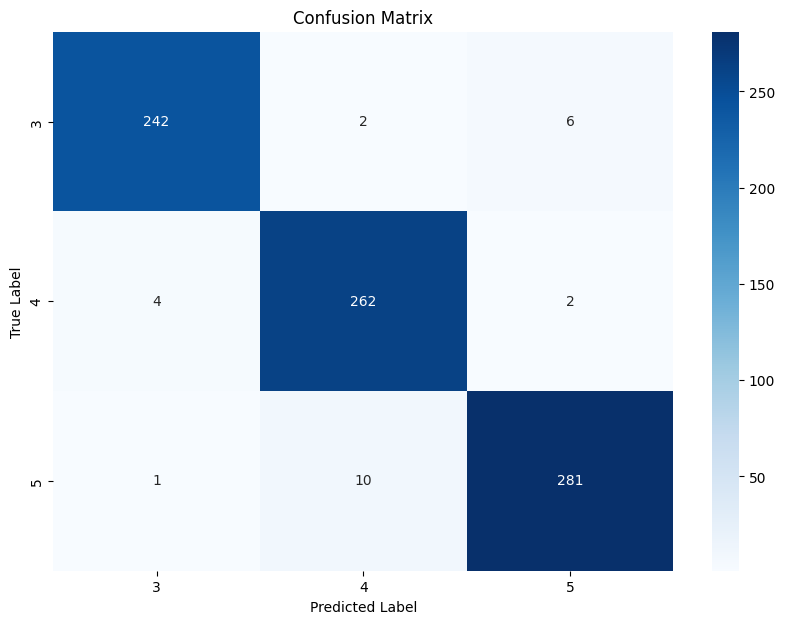

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting df1 into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_df_1, df1['sdg'], test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print the classification report to evaluate precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
